<a href="https://colab.research.google.com/github/hyelimchoi1223/AIFFEL/blob/main/%EC%8A%A4%ED%84%B0%EB%94%94/%EB%82%B4%EC%9D%B8%EC%83%9D%20%ED%86%A0%EC%B9%98%ED%86%A0%EC%B9%98%20%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98/2_PyTorch_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor
## numpy를 이용해 신경망 구성

In [ ]:
import numpy as np
import math
import time

x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
start_time = time.time()
for t in range(2000):
    # forward
    y_pred = a+b*x+c*x**2+d*x**3

    # loss 계산
    loss = np.square(y_pred-y).sum() # np.square = 제곱 함수
    if t%100 == 99:
      print(t, loss)

    # loss에 따른 a, b, c, d의 gradient를 계산하고 backword
    grad_y_pred = 2.0 * (y_pred-y) # 왜 여기서 2를 곱하는 걸까? np.square = 제곱 함수이기 때문에
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()    

    # 가중치 갱신
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'running time: {time.time()-start_time}')

99 5479.039042438214
199 3638.6375359899957
299 2417.9785469547346
399 1608.2033571944712
499 1070.8894268932254
599 714.2813881467858
699 477.54787240594214
799 320.3522369754296
899 215.94269164320724
999 146.57358032459723
1099 100.47093529546072
1199 69.82116045626923
1299 49.4376589231173
1399 35.876742176567404
1499 26.85132781867331
1599 20.84204622793878
1699 16.839234965306147
1799 14.171731170416779
1899 12.393234953066429
1999 11.206866025872092
Result: y = 0.02067688262391712 + 0.8131797772576032 x + -0.0035671063174376925 x^2 + -0.0871342067613456 x^3
running time: 0.8116581439971924


## Tensor를 이용한 신경망 구성
텐서는 GPU를 사용해서 수치 연산을 가속화한다.

In [ ]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")


x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
start_time = time.time()
for t in range(2000):
    # forward
    y_pred = a+b*x+c*x**2+d*x**3

    # loss 계산
    loss = (y_pred-y).pow(2).sum().item() # pow(2) = 제곱 함수
    if t%100 == 99:
      print(t, loss)

    # loss에 따른 a, b, c, d의 gradient를 계산하고 backword
    grad_y_pred = 2.0 * (y_pred-y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()    

    # 가중치 갱신
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
print(f'running time: {time.time()-start_time}')

99 2694.46728515625
199 1832.8671875
299 1249.062255859375
399 853.0545654296875
499 584.1417236328125
599 401.331787109375
699 276.9169006347656
799 192.14817810058594
899 134.32623291015625
999 94.83976745605469
1099 67.84355163574219
1199 49.36551284790039
1299 36.70335388183594
1399 28.016712188720703
1499 22.050464630126953
1599 17.948169708251953
1699 15.124283790588379
1799 13.178290367126465
1899 11.835793495178223
1999 10.908658027648926
Result: y = -0.04037574678659439 + 0.8322166204452515 x + 0.006965488661080599 x^2 + -0.08984202891588211 x^3
running time: 0.24078702926635742


running time을 찍어보았을 때 0.8001244068145752->0.2134418487548828 로 현저히 줄었다.

# Autograd
역전파를 자동화.    
autograd를 사용하면 순전파 단계에서 computational graph를 정의하게 된다.    
각 텐서는 노드로 표현되고, 엣지는 입력텐서->출력텐서를 만드는 함수가 된다.    
`requires_grad=True` 이면 텐서(노드)가 된다.

In [ ]:
import torch
import math

dtype=torch.float
device=torch.device('cpu')

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
start_time = time.time()
for t in range(2000):
    # forward
    y_pred = a+b*x+c*x**2+d*x**3

    # loss 계산
    loss = (y_pred-y).pow(2).sum() # pow(2) = 제곱 함수
    if t%100 == 99:
        print(t, loss)

    # 역전파 계산. requires_grad=True를 갖는 모든 텐서들의 loss 변화도를 계산
    loss.backward()

    with torch.no_grad():
        # 가중치 갱신
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
print(f'running time: {time.time()-start_time}')

99 tensor(784209.4375, grad_fn=<SumBackward0>)
199 tensor(784188., grad_fn=<SumBackward0>)
299 tensor(784166.6250, grad_fn=<SumBackward0>)
399 tensor(784145.5625, grad_fn=<SumBackward0>)
499 tensor(784124.4375, grad_fn=<SumBackward0>)
599 tensor(784103.6250, grad_fn=<SumBackward0>)
699 tensor(784082.8125, grad_fn=<SumBackward0>)
799 tensor(784062.1875, grad_fn=<SumBackward0>)
899 tensor(784041.7500, grad_fn=<SumBackward0>)
999 tensor(784021.4375, grad_fn=<SumBackward0>)
1099 tensor(784001.1250, grad_fn=<SumBackward0>)
1199 tensor(783981.1250, grad_fn=<SumBackward0>)
1299 tensor(783961.2500, grad_fn=<SumBackward0>)
1399 tensor(783941.4375, grad_fn=<SumBackward0>)
1499 tensor(783921.8125, grad_fn=<SumBackward0>)
1599 tensor(783902.3125, grad_fn=<SumBackward0>)
1699 tensor(783883., grad_fn=<SumBackward0>)
1799 tensor(783863.8125, grad_fn=<SumBackward0>)
1899 tensor(783844.8125, grad_fn=<SumBackward0>)
1999 tensor(783825.7500, grad_fn=<SumBackward0>)
Result: y = -0.2587447762489319 + -0.08

## 새 autograd function 정의

In [ ]:
import torch
import math

class LegendrePolynomial3(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        """
        순전파 : 입력을 갖는 텐서를 받아 출력을 갖는 텐서를 반환
        ctx : 역전파 연산을 위한 정보저장에 사용
        ctx.save_for_backward : 역전파에서 사용할 객체를 저장
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        loss의 gradient를 입력으로 받는다.
        입력에 대한 loss의 변화도를 계산
        """
        input, = ctx.saved_tensors
        return grad_output*1.5*(5*input**2-1) # 0.5 * (5 * input ** 3 - 3 * input)의 미분 결과

In [ ]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성한다.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
start_time = time.time()
for t in range(2000):
    P3 = LegendrePolynomial3.apply

    y_pred = a + b * P3(c + d * x)

    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())    

    loss.backward()
    
    with torch.no_grad():
        # 가중치 갱신
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
print(f'running time: {time.time()-start_time}')

99 458.8755798339844
199 456.2812805175781
299 454.1430358886719
399 452.4517822265625
499 451.19842529296875
599 450.37432861328125
699 449.9708557128906
799 449.9797058105469
899 450.3927307128906
999 451.2021484375
1099 452.4001770019531
1199 453.9793701171875
1299 455.93255615234375
1399 458.2525329589844
1499 460.9324645996094
1599 463.9656982421875
1699 467.3455505371094
1799 471.0657958984375
1899 475.1202392578125
1999 479.5029296875
Result: y = 0.13974225521087646 + -0.8984336853027344 x + -0.024109112098813057 x^2 + 0.2855756878852844 x^3
running time: 0.5337777137756348


# NN 모듈
신경망과 거의 비슷한 Module의 집합을 정의.    
Module은 입력 텐서를 받고 출력 텐서를 계산. 하이퍼 파라미터를 갖는 텐서들은 내부 상태로 갖는다.
NN 패키지는 유용한 loss function도 정의하고 있다.

In [ ]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p) # unsqueeze(-1) : -1 마지막 차원을 의미

In [ ]:
x.unsqueeze(-1).shape, p.shape

(torch.Size([2000, 1]), torch.Size([3]))

In [ ]:
# nn 패키지를 이용해 sequential layer를 정의한다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

        # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
        model.zero_grad()
        loss.backward()

        with torch.no_grad():
          for param in model.parameters():
              param -= learning_rate * param.grad

99 8259.2470703125
199 7153.77880859375
299 6321.1904296875
399 5635.70556640625
499 5058.59375
599 4570.06298828125
699 4155.8662109375
799 3804.42724609375
899 3506.048828125
999 3252.546630859375
1099 3037.002197265625
1199 2853.564453125
1299 2697.28564453125
1399 2563.981201171875
1499 2450.111572265625
1599 2352.683349609375
1699 2269.1650390625
1799 2197.415283203125
1899 2135.62353515625
1999 2082.2578125


In [ ]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.5877833962440491 + -0.333629310131073 x + -0.17537115514278412 x^2 + 0.07598938792943954 x^3


In [ ]:
linear_layer.weight.shape

torch.Size([1, 3])

## optim

In [ ]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p) # unsqueeze(-1) : -1 마지막 차원을 의미

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [ ]:
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

learning_rate = 1e-6
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다.
    optimizer.zero_grad()
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()

99 4233.75927734375
199 2580.20068359375
299 1813.23779296875
399 1402.61962890625
499 1111.858154296875
599 872.111328125
699 673.7342529296875
799 511.23828125
899 379.8326110839844
999 275.0560607910156
1099 192.3987579345703
1199 128.11036682128906
1299 79.78936767578125
1399 45.949825286865234
1499 24.86513900756836
1599 13.9403657913208
1699 9.810858726501465
1799 8.951998710632324
1899 8.903158187866211
1999 8.910503387451172


In [ ]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = -4.991118203179212e-06 + 0.856296718120575 x + -5.149501703272108e-06 x^2 + -0.09384802728891373 x^3


## 사용자 정의 nn.Module

In [ ]:
import torch
import math

class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 4개의 매개변수를 생성(instantiate)하고, 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        순전파 함수에서는 입력 데이터의 텐서를 받고 출력 데이터의 텐서를 반환해야 합니다.
        텐서들 간의 임의의 연산뿐만 아니라, 생성자에서 정의한 Module을 사용할 수 있습니다.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

In [ ]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = Polynomial3()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

99 3783.805908203125
199 2670.328857421875
299 1885.7158203125
399 1332.6943359375
499 942.80810546875
599 667.8714599609375
699 473.9512634277344
799 337.14569091796875
899 240.61422729492188
999 172.48843383789062
1099 124.40119934082031
1199 90.45289611816406
1299 66.482666015625
1399 49.555442810058594
1499 37.60016632080078
1599 29.155420303344727
1699 23.189678192138672
1799 18.974727630615234
1899 15.996487617492676
1999 13.891875267028809
Result: y = 0.07479018718004227 + 0.8655559420585632 x + -0.012902550399303436 x^2 + -0.09458425641059875 x^3


## 제어 흐름 + 가중치 공유

In [ ]:
import random
import torch
import math

class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        생성자에서 5개의 매개변수를 생성(instantiate)하고 멤버 변수로 지정합니다.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        모델의 순전파 단계에서는 무작위로 4, 5 중 하나를 선택한 뒤 매개변수 e를 재사용하여
        이 차수들의의 기여도(contribution)를 계산합니다.

        각 순전파 단계는 동적 연산 그래프를 구성하기 떄문에, 모델의 순전파 단계를 정의할 때
        반복문이나 조건문과 같은 일반적인 Python 제어-흐름 연산자를 사용할 수 있습니다.

        여기에서 연산 그래프를 정의할 때 동일한 매개변수를 여러번 사용하는 것이 완벽히 안전하다는
        것을 알 수 있습니다.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
        return y

    def string(self):
        """
        Python의 다른 클래스(class)처럼, PyTorch 모듈을 사용해서 사용자 정의 메소드를 정의할 수 있습니다.
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 ? + {self.e.item()} x^5 ?'

In [ ]:
# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

# 손실 함수와 optimizer를 생성합니다. 이 이상한 모델을 순수한 확률적 경사하강법(SGD; Stochastic Gradient Descent)으로
# 학습하는 것은 어려우므로, 모멘텀(momentum)을 사용합니다.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(x)

    # 손실을 계산하고 출력합니다.
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

1999 5663.07568359375
3999 2272.40966796875
5999 1096.51513671875
7999 533.1947021484375
9999 247.43527221679688
11999 131.8475341796875
13999 68.57860565185547
15999 37.11836624145508
17999 22.614126205444336
19999 16.406208038330078
21999 12.479074478149414
23999 10.453495979309082
25999 9.655424118041992
27999 9.094375610351562
29999 8.891033172607422
Result: y = -0.013558934442698956 + 0.8523661494255066 x + 0.0019412304973229766 x^2 + -0.0928896814584732 x^3 + 8.881314715836197e-05 x^4 ? + 8.881314715836197e-05 x^5 ?


# ✅  TORCH.NN

PyTorch는 신경망을 생성하고 학습시키는 것을 도와주기 위해 `torch.nn, torch.optim, Dataset, DataLoader`와 같은 모듈과 클래스를 제공한다. 이것들을 최대한 활용하고 문제에 맞게 커스텀하기 위해서는 이 모듈와 클래스들이 무엇을 하는지 알아야 할 필요가 있다.    

여기서는 MNIST를 이용해 신경망을 학습시킨다.

## MNIST 데이터 준비
`pathlib`과 `requests`를 이용해 MNIST 데이터셋을 다운로드한다.    

* `pathlib` : 파일 시스템 경로를 문자열이 아니라 객체로 다룬다.

In [ ]:
from pathlib import Path
import requests

DATA_PATH = Path("data") # PosixPath('data')
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

데이터 직렬화를 위한 포맷인 pickle을 이용하여 저장되어 있고, 데이터셋은 numpy 배열로 이루어져있다.

In [ ]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [ ]:
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_valid: {x_valid.shape}, y_valid: {y_valid.shape}')

x_train: (50000, 784), y_train: (50000,)
x_valid: (10000, 784), y_valid: (10000,)


In [ ]:
x_train[0].shape

(784,)

각 이미지는 28x28 형태이고, 데이터 하나의 행은 784(=28*28) 로 저장되어 있다.    
이것을 2d 이미지로 재구성한다.

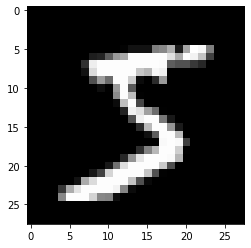

In [ ]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28,28)), cmap='gray')

numpy 배열로 이루어져있는 데이터를 tensor로 변환한다.

In [ ]:
import torch

x_train_tensor, y_train_tensor, x_valid_tensor, y_valid_tensor = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
print(f'x_train: {x_train_tensor.shape}, y_train: {y_train_tensor.shape}')
print(f'x_valid: {x_valid_tensor.shape}, y_valid: {y_valid_tensor.shape}')

x_train: torch.Size([50000, 784]), y_train: torch.Size([50000])
x_valid: torch.Size([10000, 784]), y_valid: torch.Size([10000])


In [ ]:
print(y_train_tensor.min(), y_train_tensor.max())

tensor(0) tensor(9)


## torch.nn 없이 밑바닥부터 신경망 만들기

**Xavier initialisation**    
이전 노드와 다음 노드의 개수에 의존해 초기화 하는 것.    
여기서는 `1/sqrt(n)` 을 곱해주는 것으로 초기화.

### 모델 구현

In [ ]:
import math
# 가중치와 bias는 랜덤 또는 0으로만 이루어진 텐서로 생성한다. 
# 가중치 초기화는 Xavier initialisation을 이용한다.
weights = torch.randn(784, 10) / math.sqrt(784)
bias = torch.zeros(10, requires_grad=True)
# 가중치는 requires_grad를 초기화 다음에 설정한다.-> 초기화 단계를 역전파계산에 포함시키지 않기 위해서
weights.requires_grad_()

tensor([[ 0.0072,  0.0231, -0.0495,  ...,  0.0015, -0.0651, -0.0122],
        [ 0.0314,  0.0503, -0.0142,  ..., -0.0045,  0.0038, -0.0195],
        [ 0.0135, -0.0068, -0.0428,  ...,  0.0261, -0.0154, -0.0304],
        ...,
        [-0.0074, -0.0585, -0.0031,  ..., -0.0512, -0.0611,  0.0167],
        [ 0.0059, -0.0021,  0.0069,  ..., -0.0378, -0.0016, -0.0072],
        [ 0.0228, -0.0075, -0.0271,  ..., -0.0497, -0.0128, -0.0128]],
       requires_grad=True)

In [ ]:
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

❗ `_` 이것이 끝에 붙어있는 메서드는 in-place로 수행된다는 것을 의미

---
**모델을 만들기 위해 필요한 것**
* activation function : log_softmax
* loss function



In [ ]:
def log_softmax(x):
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias) # @ : 내적

하나의 배치 데이터에 대해 모델을 학습

In [ ]:
BATCH_SIZE = 64

xb = x_train_tensor[0:BATCH_SIZE]  # x로부터 미니배치(mini-batch) 추출
preds = model(xb)  # 예측
preds[0], preds.shape
print(preds[0], preds.shape)

tensor([-2.2115, -2.4580, -2.2605, -1.9855, -2.0223, -2.2724, -2.3142, -2.6582,
        -2.7045, -2.3858], grad_fn=<SelectBackward>) torch.Size([64, 10])


### loss function 구현
negative log-likelihood를 구현한다.

In [ ]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean() # 이미 input이 log가 취해져 있기 때문에 따로 log를 씌워주지 않은 듯 하다.

loss_func = nll

In [ ]:
yb = y_train_tensor[0:BATCH_SIZE]
print(loss_func(preds, yb))

tensor(2.3328, grad_fn=<NegBackward>)


### 모델 평가하는 함수 구현
정확도를 계산하기 위한 함수를 구현한다.

In [ ]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [ ]:
print(accuracy(preds, yb))

tensor(0.0781)


### 훈련 루프 실행
매 반복(epoch)마다 다음을 수행한다.
1. 미니배치 선택
2. 모델을 이용해 예측
3. 손실(loss)를 계산
4. backward를 이용해 기울기 업데이트.(weight, bias)

In [ ]:
from IPython.core.debugger import set_trace

lr = 0.5  # 학습률(learning rate)
epochs = 2  # 훈련에 사용할 에폭(epoch) 수
n, c = x_train_tensor.shape
for epoch in range(epochs):
    for i in range((n - 1) // BATCH_SIZE + 1):
        start_i = i * BATCH_SIZE
        end_i = start_i + BATCH_SIZE
        xb = x_train_tensor[start_i:end_i]
        yb = y_train_tensor[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

In [ ]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0815, grad_fn=<NegBackward>) tensor(1.)


###### set_trace() 사용예시

In [ ]:
lr = 0.5  # 학습률(learning rate)
epochs = 2  # 훈련에 사용할 에폭(epoch) 수
n, c = x_train_tensor.shape
for epoch in range(epochs):
    for i in range((n - 1) // BATCH_SIZE + 1):
        set_trace()
        start_i = i * BATCH_SIZE
        end_i = start_i + BATCH_SIZE
        xb = x_train_tensor[start_i:end_i]
        yb = y_train_tensor[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -s= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

> <ipython-input-90-2910fe7bab2d>(7)<module>()
      5     for i in range((n - 1) // BATCH_SIZE + 1):
      6         set_trace()
----> 7         start_i = i * BATCH_SIZE
      8         end_i = start_i + BATCH_SIZE
      9         xb = x_train_tensor[start_i:end_i]

ipdb> s
> <ipython-input-90-2910fe7bab2d>(8)<module>()
      6         set_trace()
      7         start_i = i * BATCH_SIZE
----> 8         end_i = start_i + BATCH_SIZE
      9         xb = x_train_tensor[start_i:end_i]
     10         yb = y_train_tensor[start_i:end_i]

ipdb> s
> <ipython-input-90-2910fe7bab2d>(9)<module>()
      7         start_i = i * BATCH_SIZE
      8         end_i = start_i + BATCH_SIZE
----> 9         xb = x_train_tensor[start_i:end_i]
     10         yb = y_train_tensor[start_i:end_i]
     11         pred = model(xb)

ipdb> xb
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
 

BdbQuit: ignored

## torch.nn.functional을 사용해 코드 리팩토링
nn 클래스를 활용해 코드를 더 간결하고 유연하게 리팩토링 할 수 있다.
처음 단계에서는 직접 작성한 활성화, 손실 함수를 `torch.nn.functional`로 대체한다.

In [ ]:
# def nll(input, target):
#     return -input[range(target.shape[0]), target].mean() # 이미 input이 log가 취해져 있기 때문에 따로 log를 씌워주지 않은 듯 하다.

# loss_func = nll

In [ ]:
# def log_softmax(x):
#     return x - x.exp().sum(-1).log().unsqueeze(-1)

In [ ]:
import torch.nn.functional as F

loss_func = F.cross_entropy # log softmax와 negative log-likelihood를 결합하는 cross_entropy를 제공한다.

def model(xb):
    return xb @ weights + bias

In [ ]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb)) # 이전과 정확도 동일한 것을 확인

tensor(0.0815, grad_fn=<NllLossBackward>) tensor(1.)


## nn.Module을 이용해 리팩토링 하기

In [ ]:
# weights = torch.randn(784, 10) / math.sqrt(784)
# bias = torch.zeros(10, requires_grad=True)
# weights.requires_grad_()

In [ ]:
# def model(xb):
#     return log_softmax(xb @ weights + bias)

In [ ]:
from torch import nn
import math

class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784,10)/math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias

In [ ]:
model = Mnist_Logistic() # model함수를 사용하는 대신 객체로 사용하기 때문에, 모델을 인스턴스화 해야 한다.

nn.Module 객체는 함수처럼 사용된다.(호출이 가능하다.) 하지만 PyTorch는 forward 메소드를 자동으로 호출한다.

In [ ]:
print(loss_func(model(xb), yb))

tensor(2.2531, grad_fn=<NllLossBackward>)


이전에는 가중치와 bias에 대한 기울기를 수동으로 0으로 초기화해야 했지만 nn.Module를 사용하면서 간결하게 만들 수 있다.

In [ ]:
# with torch.no_grad():
#     weights -= weights.grad * lr
#     bias -= bias.grad * lr
#     weights.grad.zero_()
#     bias.grad.zero_()

In [ ]:
# with torch.no_grad():
#     for p in model.parameters(): p -= p.grad * lr
#     model.zero_grad()

In [ ]:
def fit():
    for epoch in range(epochs):
        for i in range((n - 1) // BATCH_SIZE + 1):
            start_i = i * BATCH_SIZE
            end_i = start_i + BATCH_SIZE
            xb = x_train_tensor[start_i:end_i]
            yb = y_train_tensor[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb)

            loss.backward()
            with torch.no_grad():
                for p in model.parameters():
                    p -= p.grad * lr
                model.zero_grad()

fit()

In [ ]:
print(loss_func(model(xb), yb))

tensor(0.0817, grad_fn=<NllLossBackward>)


## nn.Linear를 이용해 리팩토링 하기

가중치와 bias초기화, `xb @ self.weights + self.bias`를 계산하는 대신 nn.Linear를 사용한다.

In [ ]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784,10)/math.sqrt(784))
        self.bias = nn.Parameter(torch.zeros(10))

    def forward(self, xb):
        return xb @ self.weights + self.bias
    
    def getweights(self):
        return self.weights

    def getbias(self):
        return self.bias

init_model = Mnist_Logistic()
init_model.getweights().shape, init_model.getbias().shape

(torch.Size([784, 10]), torch.Size([10]))

In [ ]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

    def getweights(self):
        return self.lin

init_model = Mnist_Logistic()
init_model.getweights()

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model = Mnist_Logistic()
print(loss_func(model(xb), yb))

tensor(2.3441, grad_fn=<NllLossBackward>)


In [ ]:
fit()

print(loss_func(model(xb), yb))

tensor(0.0824, grad_fn=<NllLossBackward>)


## optim을 이용하여 리팩토링 하기
다양한 최적화 알고리즘을 가진 torch.optim을 사용해 매개변수를 수동으로 업데이트 하는 대신 step을 사용해 업데이트를 진행한다.

In [ ]:
# with torch.no_grad():
#     for p in model.parameters(): p -= p.grad * lr
#     model.zero_grad()

In [ ]:
# opt.step()
# opt.zero_grad()

In [ ]:
from torch import optim

In [ ]:
print(f'learning rate: {lr}')

learning rate: 0.5


In [ ]:
def get_model():
    model = Mnist_Logistic()
    return model, optim.SGD(model.parameters(), lr=lr)

model, opt = get_model()
print(loss_func(model(xb), yb))

tensor(2.2713, grad_fn=<NllLossBackward>)


In [ ]:
for epoch in range(epochs):
    for i in range((n - 1) // BATCH_SIZE + 1):
        start_i = i * BATCH_SIZE
        end_i = start_i + BATCH_SIZE
        xb = x_train_tensor[start_i:end_i]
        yb = y_train_tensor[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0804, grad_fn=<NllLossBackward>)


## Dataset을 이용해 리팩토링 하기
PyTorch에는 추상 Dataset 클래스가 있는데 이것은 `__len__`, `__getitem__` 함수를 갖고 있으면 어떤 것이라고 될 수 있다. 

PyTorch의 TensorDataset은 텐서를 감싸는 Dataset이다. 

In [ ]:
from torch.utils.data import TensorDataset

`x_train_tensor, y_train_tensor` 모두 하나의 TensorDataset으로 합쳐질 수 있다.

In [ ]:
train_ds = TensorDataset(x_train_tensor, y_train_tensor)

In [ ]:
# start_i = i * BATCH_SIZE
# end_i = start_i + BATCH_SIZE
# xb = x_train_tensor[start_i:end_i]
# yb = y_train_tensor[start_i:end_i]

In [ ]:
# xb,yb = train_ds[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE]

In [ ]:
model, opt = get_model()

for epoch in range(epochs):
    for i in range((n - 1) // BATCH_SIZE + 1):
        xb, yb = train_ds[i * BATCH_SIZE: i * BATCH_SIZE + BATCH_SIZE]
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0815, grad_fn=<NllLossBackward>)


## DataLoader를 이용한 리팩토링 하기
DataLoader는 배치 관리를 담당한다.

In [ ]:
from torch.utils.data import DataLoader

train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE)

In [ ]:
# for i in range((n - 1) // BATCH_SIZE + 1):
#         xb, yb = train_ds[i * BATCH_SIZE: i * BATCH_SIZE + BATCH_SIZE]

In [ ]:
i = 0
for xb,yb in train_dl:      
      pred = model(xb)
      if i == 0:
          print(pred.shape)

      i += 1

torch.Size([64, 10])


In [ ]:
model, opt = get_model()

for epoch in range(epochs):
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

print(loss_func(model(xb), yb))

tensor(0.0821, grad_fn=<NllLossBackward>)


## validation 추가하기
과적합을 확인하기 위해서는 항상 검증 데이터셋(validation set)이 있어야 한다.    
training dataset을 섞는 것은 과적합을 방지하기 위해서 중요하지만 validation loss는 검증 데이터 셋을 섞든 안 섞든 동일하다. 따라서 검증 데이터셋은 섞는 과정이 필요가 없다.    
검증 데이터 셋에 대해서는 배치 사이즈를 훈련 데이터셋의 2배를 사용한다. 검증 데이터셋에 대해서는 역전파를 진행하지 않으므로 메모리를 덜 사용하기 때문이다.

In [ ]:
train_ds = TensorDataset(x_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

valid_ds = TensorDataset(x_valid_tensor, y_valid_tensor)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE * 2)

(훈련 전에 항상 model.train() 을 호출하고, 추론(inference) 전에 model.eval() 을 호출합니다, 이는 nn.BatchNorm2d 및 nn.Dropout 과 같은 레이어에서 이러한 다른 단계(훈련, 추론) 에 대한 적절한 동작이 일어나게 하기 위함입니다.)

In [ ]:
model, opt = get_model()

for epoch in range(epochs):
    model.train()
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        opt.step()
        opt.zero_grad()

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb), yb) for xb, yb in valid_dl)

    print(epoch, valid_loss / len(valid_dl))

0 tensor(0.3291)
1 tensor(0.3186)


## fit()와 get_data() 생성하기
훈련 데이터셋과 검증 데이터셋 모두 손실을 계산하는 프로세스를 두번 거치므로 하나의 배치에 대한 손실을 계산하는 함수를 만들어본다. 
* 훈련 데이터셋에 대해서 : 훈련 데이터셋은 옵티마이저를 전달하기 때문에 옵티마이저가 전달되면 역전파를 수행한다.
* 검증 데이터셋에 대해서 : 검증 데이터셋은 옵티마이저를 전달하지 않으므로 옵티마이저가 전달되지 않으면 역전파를 수행하지 않는다.

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [ ]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [ ]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [ ]:
train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.38482226976156236
1 0.3013994958758354


## CNN으로 넘어가기

In [ ]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        print(xb.shape)
        xb = xb.view(-1, 1, 28, 28)
        print(xb.shape)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

In [ ]:
model = Mnist_CNN()
i = 0
for xb, yb in train_dl:
    if i == 1:
        break
    pred = model(xb)        
    i+=1

torch.Size([64, 784])
torch.Size([64, 1, 28, 28])


In [ ]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):        
        xb = xb.view(-1, 1, 28, 28)        
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1

In [ ]:
model = Mnist_CNN()
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.5857456841468811
1 0.5069121707439422


❗️momentum    
SGD를 적절한 방향으로 가속해 흔들림을 줄여주는 매개변수

## nn.Sequential
안에 포함된 모듈을 순차적으로 실행한다.

In [ ]:
class Lambda(nn.Module): # View 레이어가 없으므로 Sequential로 신경망을 정의할 때 사용할 수 있는 레이어 생성
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


def preprocess(x):
    return x.view(-1, 1, 28, 28)

In [ ]:
model = nn.Sequential(
    Lambda(preprocess),
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(4),
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.34886352350711824
1 0.31958685998916625


## DataLoader 감싸기
지금까지 작업한 CNN은 MNIST에서만 작동한다.
* 입력이 28x28 벡터라고 가정한다.
* 최종적으로 CNN 그리드 크기를 4x4로 가정한다.

이것을 수정해 모든 단일 채널 이미지에서 작동하도록 수정해보자.

In [ ]:
def preprocess(x, y):
    return x.view(-1, 1, 28, 28), y

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

In [ ]:
train_dl, valid_dl = get_data(train_ds, valid_ds, BATCH_SIZE)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1), # AvgPool2d를 AdaptiveAvgPool2d로 바꿔 입력 텐서가 아니라 출력 텐서의 크기를 정의한다.
    Lambda(lambda x: x.view(x.size(0), -1)),
)

opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.3278955442428589
1 0.3502625140666962


## GPU 사용하기
GPU를 사용하려면 tensor와 model을 모두 gpu에서 작동하도록 설정해야 한다.

In [ ]:
print(torch.cuda.is_available())

NameError: ignored

In [ ]:
# dev = torch.device(
#     "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
# def preprocess(x, y):
#     return x.view(-1, 1, 28, 28).to(dev), y.to(dev)


# train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
# train_dl = WrappedDataLoader(train_dl, preprocess)
# valid_dl = WrappedDataLoader(valid_dl, preprocess)

In [ ]:
# model.to(dev)
# opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [ ]:
# fit(epochs, model, loss_func, opt, train_dl, valid_dl)

# TensorBoard